In [63]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
pwd = '/content/drive/My Drive/Colab Notebooks/data visualization/data/Zillow_90001_to_90099.csv'
base = '/content/drive/My Drive/Colab Notebooks/data visualization/data/'

In [65]:
!pip3 install python-googlegeocoder
!pip3 install gmplot

In [0]:
import numpy as np
import pandas as pd
from googlegeocoder import GoogleGeocoder # Package used to access google api to have the geologcal data
import matplotlib.pyplot as plt
import seaborn as sb # Pcakge used to do statistical visualization
import os

import gmplot # Use to do the geometric map plotting based on google map

**Read the Zillow Data CVS file**

In [24]:
dat = pd.read_csv(pwd)
print(len(dat))
dat.head(10)

4273


,address,city,state,zip,price,sqft,bedrooms,bathrooms,days_on_zillow,sale_type,url
0,5927 Junction St,LOS ANGELES,CA,90001,435000.0,1222.0,3.0,1.0,1.0,House for sale,http://www.zillow.com/homes/for_sale//homedeta...
1,8116 Stanford Ave,LOS ANGELES,CA,90001,615000.0,3280.0,5.0,3.0,1.0,Apartment for sale,http://www.zillow.com/homes/for_sale//homedeta...
2,819 E 75th St,LOS ANGELES,CA,90001,750000.0,1322.0,4.0,4.0,NaN,House for sale,http://www.zillow.com/homes/for_sale//homedeta...
3,838 E 76th St,LOS ANGELES,CA,90001,440000.0,1192.0,3.0,2.0,2.0,Apartment for sale,http://www.zillow.com/homes/for_sale//homedeta...
4,636 E 73rd St,LOS ANGELES,CA,90001,778000.0,3488.0,10.0,6.0,4.0,Apartment for sale,http://www.zillow.com/homes/for_sale//homedeta...
5,8019 Hooper Ave,LOS ANGELES,CA,90001,439000.0,1061.0,4.0,2.0,NaN,Apartment for sale,http://www.zillow.com/homes/for_sale//homedeta...
6,842 E 85th St,LOS ANGELES,CA,90001,415000.0,1512.0,4.0,2.0,NaN,House for sale,http://www.zillow.com/homes/for_sale//homedeta...
7,7809 Crockett Blvd,Los Angeles,CA,90001,1399000.0,NaN,10.0,10.0,17.0,House for sale,http://www.zillow.com/homes/for_sale//homedeta...
8,7512 Mckinley Ave,LOS ANGELES,CA,90001,370000.0,858.0,2.0,2.0,134.0,House for sale,http://www.zillow.com/homes/for_sale//homedeta...
9,7920 Hooper Ave,LOS ANGELES,CA,90001,459000.0,1550.0,4.0,2.0,1.0,Apartment for sale,http://www.zillow.com/homes/for_sale//homedeta...


**Missing Values Check**

In [21]:
print('total rows contain NaN: ',dat.isnull().T.any().T.sum())
col_names = list(dat.columns.values)
for name in col_names:
  print('total number of NaN in the column ',name,' : ',dat[name].isnull().sum())

total rows contain NaN:  2525
total number of NaN in the column  address  :  0
total number of NaN in the column  city  :  0
total number of NaN in the column  state  :  0
total number of NaN in the column  zip  :  0
total number of NaN in the column  price  :  897
total number of NaN in the column  sqft  :  110
total number of NaN in the column  bedrooms  :  217
total number of NaN in the column  bathrooms  :  336
total number of NaN in the column  days_on_zillow  :  1369
total number of NaN in the column  sale_type  :  0
total number of NaN in the column  url  :  0


**Housing for sales in each Zipcode Area**

We would plot out the number of housing sale posts by the zipcode through a barplot. It would give us a biasic idea about how the housing  for sale distributed by the areas.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


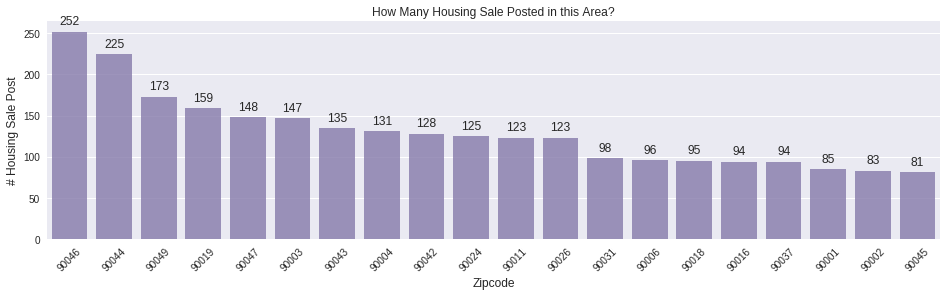

In [7]:
color = sb.color_palette() # Set up the color choices

x=dat['zip'].value_counts() # Count the values for each zipcode
x=x.sort_values(ascending=False) # Sort the counts descendingly
x=x.iloc[0:20] # Choose the first 20 zipcodes to visualize
plt.figure(figsize=(16,4))
ax = sb.barplot(x.index,x.values,alpha=0.8,color=color[3],order=x.index)
plt.title("How Many Housing Sale Posted in this Area?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# Housing Sale Post', fontsize=12)
plt.xlabel('Zipcode', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

**Housing Sale Posting Geometric Distribution**

We would access the google map API to transfer all the address to be the location coordinates. And then we could visualize all the posts directly on a map.

You only need to run the codes below for one time and please save the result into a csv file.

There might be some address that does not have a proper coordinates found from google map. These coordinates have been set to be (0,0).

In [12]:
geocoder = GoogleGeocoder("<Your own API Key>")
Address = dat['address'].values
loc_cord = []
for t,ads in enumerate(Address):
  try:
    search = geocoder.get(ads)
    loc_cord.append([search[0].geometry.location.lat,search[0].geometry.location.lng])
  except ValueError:
    loc_cord.append([0,0])
    continue
  if t%100 == 0:
    print('No.%d coordinates finished' %t)
    
print(len(loc_cord))

No.0 coordinates finished
No.100 coordinates finished
No.200 coordinates finished
No.300 coordinates finished
No.400 coordinates finished
No.500 coordinates finished
No.600 coordinates finished
No.700 coordinates finished
No.800 coordinates finished
No.900 coordinates finished
No.1000 coordinates finished
No.1100 coordinates finished
No.1200 coordinates finished
No.1300 coordinates finished
No.1400 coordinates finished
No.1500 coordinates finished
No.1600 coordinates finished
No.1700 coordinates finished
No.1800 coordinates finished
No.1900 coordinates finished
No.2000 coordinates finished
No.2100 coordinates finished
No.2200 coordinates finished
No.2300 coordinates finished
No.2400 coordinates finished
No.2500 coordinates finished
No.2600 coordinates finished
No.2700 coordinates finished
No.2800 coordinates finished
No.2900 coordinates finished
No.3000 coordinates finished
No.3100 coordinates finished
No.3200 coordinates finished
No.3300 coordinates finished
No.3400 coordinates finish

Save the coordinates to a csv file

In [0]:
lat = [a[0] for a in loc_cord]
lng = [a[1] for a in loc_cord]

coord_dat_dic = {'LAT':lat,'LNG':lng}
coord_dat = pd.DataFrame(coord_dat_dic)
coord_dat.to_csv(os.path.join(base,'coord.csv'))

Read the coordinates file

In [17]:
coord_dat = pd.read_csv(os.path.join(base,'coord.csv'))
coord_dat.head(10)

,Unnamed: 0,LAT,LNG
0,0,33.986130,-118.242726
1,1,33.964936,-118.262772
2,2,33.972437,-118.260113
3,3,33.970926,-118.259416
4,4,33.973677,-118.263670
5,5,33.965978,-118.252228
6,6,33.960873,-118.259218
7,7,33.968307,-118.237164
8,8,33.971553,-118.260610
9,9,33.966804,-118.251703


Detect the addresses not have proper coordinates

In [0]:
not_proper_idx = coord_dat[coord_dat['LAT']==0].index
coord_dat = coord_dat.drop(not_proper_idx)
dat = dat.drop(not_proper_idx)

Basic View of coordinates of all the addresses

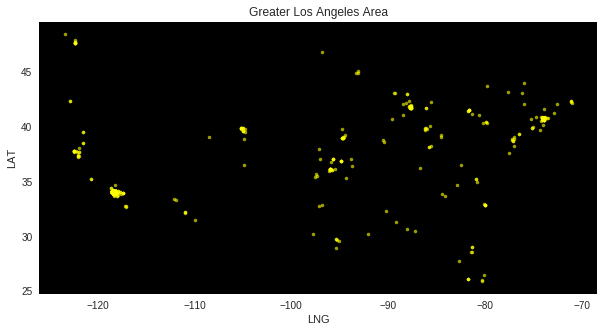

In [68]:
plt.rcParams["axes.grid"] = False # Turn of the grid lines

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
coord_dat.plot(kind='scatter', x='LNG', y='LAT',\
                        color='yellow',s=10, alpha=.6,subplots=True, ax=ax)
ax.set_title("Greater Los Angeles Area")
ax.set_facecolor('black')

In [0]:
lat = coord_dat['LAT']
lng = coord_dat['LNG']
gmap = gmplot.GoogleMapPlotter(30.3164945,78.03219179999999,13) 
gmap.draw(os.path.join(base,'map.html'))